In [64]:
pip install keras

     |████████████████████████████████| 1.3 MB 96 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install tensorflow

     |████████████████████████████████| 489.6 MB 4.6 kB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 3.9 MB 3.3 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
     |████████████████████████████████| 13.4 MB 84 kB/s s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 5.8 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 616 kB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 1.1 MB 558 kB/s eta 0:00:01
     |████████████████████████████████| 463 kB 486 kB/s eta 0:00:01
     |████████████████████████████████| 132 kB 760 kB/s eta 0:00:01
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-non

In [282]:
import numpy as np
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor, IsolationForest
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import tensorflow as tf  
from tensorflow import keras

plt.style.use('fivethirtyeight') 
mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

%matplotlib inline

In [431]:
x_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('X_test.csv')

In [432]:
for i in x_train.keys():
    x_train[i].fillna(x_train[i].mean(), inplace = True)

In [433]:
for i in x_test.keys():
    x_test[i].fillna(x_test[i].mean(), inplace = True)

In [434]:
outliers_percentage = []
variables = []
for k, v in x_train.items():
    Q1 = v.quantile(0.25)
    Q3 = v.quantile(0.75)
    IRQ = Q3 - Q1
    v_col = v[(v <= Q1 - 1.5 * IRQ) | (v >= Q3 + 1.5 * IRQ)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(x_train)[0]
    outliers_percentage.append(perc)
    variables.append(k)
#     print("Column %s outliers = %.2f%%" % (k, perc))

outliers_inTrain = pd.DataFrame({'Variable':variables, '% Outliers':outliers_percentage })
outliers_inTrain.sort_values(by=["% Outliers"],ascending=False)

,Variable,% Outliers
630,x629,100.000000
194,x193,100.000000
340,x339,100.000000
298,x297,100.000000
86,x85,13.366337
...,...,...
384,x383,0.000000
383,x382,0.000000
381,x380,0.000000
380,x379,0.000000


In [435]:
outliers_percentage = []
variables = []
for k, v in x_test.items():
    Q1 = v.quantile(0.25)
    Q3 = v.quantile(0.75)
    IRQ = Q3 - Q1
    v_col = v[(v <= Q1 - 1.5 * IRQ) | (v >= Q3 + 1.5 * IRQ)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(x_test)[0]
    outliers_percentage.append(perc)
    variables.append(k)
#     print("Column %s outliers = %.2f%%" % (k, perc))

outliers_inTest = pd.DataFrame({'Variable':variables, '% Outliers':outliers_percentage })
outliers_inTest.sort_values(by=["% Outliers"],ascending=False)

,Variable,% Outliers
630,x629,100.00000
340,x339,100.00000
194,x193,100.00000
298,x297,100.00000
252,x251,13.14433
...,...,...
384,x383,0.00000
383,x382,0.00000
381,x380,0.00000
380,x379,0.00000


In [436]:
X_train = x_train.drop(['id','x629','x193','x339','x297'], axis=1)
X_test = x_test.drop(['id','x629','x193','x339','x297'], axis=1)
y = y_train.drop(['id'], axis=1)

In [437]:
X_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,10.891876,832442.812375,20585.544083,1028.369495,1.163780e+06,9.199135,597900.477629,10389.657239,1.144294e+06,785176.201298,...,1.024198e+06,-855.549602,12176.073427,10.647729,10.916371,1220.065443,8.566724,1.036263e+06,85338.558539,103088.664210
1,11.512994,832442.898114,20585.524887,1012.624877,1.028911e+06,10.906408,597900.458612,8127.016078,1.099166e+06,785176.258299,...,1.086806e+06,-787.397942,10493.095660,10.586492,9.463962,917.094909,10.231822,1.007163e+06,95695.020645,105161.109422
2,11.052185,832442.896307,20585.512844,1003.953827,9.231756e+05,9.212979,597900.426764,10738.092422,1.027863e+06,785176.223468,...,1.018533e+06,-906.997242,10959.516944,10.769287,10.342160,637.027802,10.705461,1.019955e+06,80253.299882,104177.051666
3,11.642076,832442.859290,20585.524887,1004.672084,9.459461e+05,9.553420,597900.450367,13524.096973,1.168144e+06,785176.254867,...,1.047017e+06,-1011.742516,16845.309819,10.483830,10.594941,1114.069590,10.321063,1.085442e+06,99798.480171,102746.516920
4,10.407121,832442.831424,20585.557007,1048.958235,9.957182e+05,8.419164,597900.423639,12894.065081,1.063199e+06,785176.190880,...,1.031009e+06,-1025.223865,18348.460040,10.554762,10.057767,1230.088215,10.250096,1.024812e+06,101815.745499,105163.749149


In [438]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x0,1212.0,1.002606e+01,0.930005,6.672068e+00,9.440852e+00,1.002606e+01,1.062458e+01,1.295610e+01
x1,1212.0,8.324429e+05,0.027090,8.324428e+05,8.324428e+05,8.324429e+05,8.324429e+05,8.324429e+05
x2,1212.0,2.058552e+04,0.027888,2.058547e+04,2.058550e+04,2.058552e+04,2.058555e+04,2.058557e+04
x3,1212.0,1.048958e+03,27.157959,1.000064e+03,1.027519e+03,1.048958e+03,1.070599e+03,1.099978e+03
x4,1212.0,1.000291e+06,93510.143245,6.800215e+05,9.427006e+05,1.000291e+06,1.057470e+06,1.331630e+06
...,...,...,...,...,...,...,...,...
x827,1212.0,1.066141e+03,216.755988,4.960077e+02,9.147630e+02,1.066141e+03,1.194283e+03,2.122033e+03
x828,1212.0,1.000827e+01,0.977271,6.466963e+00,9.384658e+00,1.000827e+01,1.060345e+01,1.316311e+01
x829,1212.0,1.050199e+06,26955.133869,1.000002e+06,1.029501e+06,1.050199e+06,1.071379e+06,1.099918e+06
x830,1212.0,9.979848e+04,9221.631883,7.320799e+04,9.414920e+04,9.979848e+04,1.057612e+05,1.306944e+05


In [439]:
# outlier detection of data
x = X_train.values
clf = IsolationForest(random_state=0,contamination=.1).fit(x)
prediction = clf.predict(x)
idx = np.where(prediction<0)
# eleminate outliers 
x[idx[0],:]=np.nan
# knn imputation
imp= KNNImputer(n_neighbors=2)
x_clean = imp.fit_transform(x)
X_train = pd.DataFrame(data = x_clean, columns=X_train.keys())

In [440]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X_train)
Xn_train = pd.DataFrame(Xs, columns=X_train.keys())
Xn_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0.978921,-1.839068e+00,0.714961,-8.134125e-01,1.861951,-1.001692,1.887726,0.015577,1.551655,-0.909049,...,-9.574792e-01,1.562452e-01,-0.614896,0.347382,0.957774,0.813490,-1.519220,-5.554844e-01,-1.661356,-0.740366
1,0.000000,-4.569856e-09,0.000000,-8.870742e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.877959e-15,8.303078e-16,0.000000,0.000000,0.000000,0.000000,0.000000,9.100769e-15,0.000000,0.000000
2,1.160777,1.455654e+00,-0.455730,-1.765964e+00,-0.879683,-0.986184,-0.112465,0.259297,0.304137,-0.063242,...,-1.173508e+00,-2.195009e-01,-1.193155,0.818320,0.319269,-2.145612,0.771770,-1.192918e+00,-2.240771,-0.301872
3,0.000000,-4.569856e-09,0.000000,-8.870742e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.877959e-15,8.303078e-16,0.000000,0.000000,0.000000,0.000000,0.000000,9.100769e-15,0.000000,0.000000
4,0.429011,-1.091284e+00,1.199301,-1.016465e-02,-0.053075,-1.875437,-0.235357,1.767333,0.682750,-1.306497,...,-6.977613e-01,-1.082965e+00,2.318988,-0.012790,0.003034,0.864359,0.283989,-1.003080e+00,0.216060,0.095653


In [458]:
# apply the procedure to take the best k variables based on mutual_info_regression
feature_selection_univariate_model = SelectKBest(mutual_info_regression, k=10)

# fit the feature selection model and select the four variables
X_selected_features_univariate = feature_selection_univariate_model.fit_transform(X_train ,y['y'])

mask = feature_selection_univariate_model.get_support() #list of booleans
print("Reduced data set shape = ",X_selected_features_univariate.shape)
print("     Selected features = ",X_train .keys()[mask])
print("      Deleted Features = ", X_train .keys()[~mask])

Reduced data set shape =  (1212, 10)
     Selected features =  Index(['x85', 'x170', 'x184', 'x302', 'x408', 'x537', 'x559', 'x597', 'x619',
       'x685'],
      dtype='object')
      Deleted Features =  Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x822', 'x823', 'x824', 'x825', 'x826', 'x827', 'x828', 'x829', 'x830',
       'x831'],
      dtype='object', length=818)


In [442]:
Xn_train.values[:,mask].shape[0]*2

2424

In [459]:
# Build a model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def build_model():
    model = keras.Sequential([
        layers.Dense(5, activation = tf.nn.relu, input_shape = [Xn_train.values[:,mask].shape[1]],
        kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),
        activity_regularizer=regularizers.l2(1e-5)),
        layers.Dense(1, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),
        activity_regularizer=regularizers.l2(1e-5))
        ])
                
    model.compile(loss='mean_absolute_error',
                  optimizer =tf.keras.optimizers.Adam(0.001),
                  metrics = ['mae', 'mse']
                  )
    return model

model = build_model()

In [460]:
model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_263 (Dense)           (None, 5)                 55        
                                                                 
 dense_264 (Dense)           (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [461]:
class PrintDots(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end= '')
EPOCHS = 500
earlystop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=50)
history = model.fit(
    Xn_train.values[:,mask], y, epochs = EPOCHS, validation_split = .2, verbose = 0, callbacks = [earlystop,PrintDots()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [462]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,6.176837,6.099353,71.159531,6.970830,6.893013,106.142151,495
496,6.173775,6.096081,71.505562,6.975518,6.897570,106.198639,496
497,6.170148,6.092619,71.142914,6.965005,6.887218,105.755325,497
498,6.167493,6.089787,71.308189,6.967598,6.889750,105.743034,498
499,6.164803,6.087221,71.022507,6.957325,6.879539,105.146652,499


In [463]:
scaler = StandardScaler()
Xt = scaler.fit_transform(X_test)
Xn_test = pd.DataFrame(Xt, columns=X_test.keys())
yp = model.predict(Xn_test.values[:,mask])
print(yp)
idx = [float(i) for i in range(len(yp))]
result = pd.DataFrame({'id':idx, 'y':yp.T[0]})
result.to_csv('result.csv',index=False)


[[ 68.34613 ]
 [ 70.01441 ]
 [ 66.64817 ]
 [ 63.754505]
 [ 72.29805 ]
 [ 83.78456 ]
 [ 68.38533 ]
 [ 68.23107 ]
 [ 78.802734]
 [ 80.58006 ]
 [ 63.48318 ]
 [ 77.4104  ]
 [ 66.96213 ]
 [ 81.30553 ]
 [ 63.058517]
 [ 94.21242 ]
 [ 70.50724 ]
 [ 72.75617 ]
 [ 69.805626]
 [ 71.30571 ]
 [ 70.43971 ]
 [ 71.75514 ]
 [ 72.95972 ]
 [ 73.45945 ]
 [ 64.350266]
 [ 70.33115 ]
 [ 58.111717]
 [ 72.89401 ]
 [ 67.87908 ]
 [ 71.3147  ]
 [ 66.65299 ]
 [ 69.56921 ]
 [ 57.794754]
 [ 71.19861 ]
 [ 71.98767 ]
 [ 68.9858  ]
 [ 71.08065 ]
 [ 67.0155  ]
 [ 67.57985 ]
 [ 65.70256 ]
 [ 73.98602 ]
 [ 71.76754 ]
 [ 72.141655]
 [ 74.41532 ]
 [ 79.49117 ]
 [ 63.73948 ]
 [ 65.31204 ]
 [ 74.06934 ]
 [ 72.79635 ]
 [ 67.14153 ]
 [ 79.53186 ]
 [ 69.53795 ]
 [ 66.211296]
 [ 79.932465]
 [ 78.08292 ]
 [ 71.99774 ]
 [ 68.60358 ]
 [ 73.492294]
 [ 71.249176]
 [ 65.098236]
 [ 63.70938 ]
 [ 70.9308  ]
 [ 68.13547 ]
 [ 68.84259 ]
 [ 75.17485 ]
 [ 58.968964]
 [ 70.393394]
 [ 83.43098 ]
 [ 61.12349 ]
 [ 70.95751 ]
 [ 68.90048 ]
 [ 74.

In [262]:
encoder_input = keras.Input(shape=(36, 36, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(32, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
decoder_input = keras.layers.Dense(1296, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((36, 36, 1))(decoder_input)
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 36, 36, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 1296)              0         
                                                                 
 dense_158 (Dense)           (None, 32)                41504     
                                                                 
 dense_159 (Dense)           (None, 1296)              42768     
                                                                 
 reshape_1 (Reshape)         (None, 36, 36, 1)         0         
                                                                 
Total params: 84,272
Trainable params: 84,272
Non-trainable params: 0
_________________________________________________________________


In [277]:
autoencoder.compile(opt, loss='mse')

In [278]:
epochs=100

for epoch in range(epochs):

    history = autoencoder.fit(
      t_set,
      t_set,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

24/24 [==============================] - 0s 7ms/step - loss: 0.3484 - val_loss: 0.0916
INFO:tensorflow:Assets written to: models/AE-1.model/assets
24/24 [==============================] - 0s 5ms/step - loss: 0.2359 - val_loss: 0.0818
INFO:tensorflow:Assets written to: models/AE-2.model/assets
24/24 [==============================] - 0s 5ms/step - loss: 0.2228 - val_loss: 0.0803
INFO:tensorflow:Assets written to: models/AE-3.model/assets
24/24 [==============================] - 0s 5ms/step - loss: 0.2204 - val_loss: 0.0800
INFO:tensorflow:Assets written to: models/AE-4.model/assets
24/24 [==============================] - 0s 5ms/step - loss: 0.2198 - val_loss: 0.0796
INFO:tensorflow:Assets written to: models/AE-5.model/assets
24/24 [==============================] - 0s 5ms/step - loss: 0.2189 - val_loss: 0.0794
INFO:tensorflow:Assets written to: models/AE-6.model/assets
24/24 [==============================] - 0s 5ms/step - loss: 0.2174 - val_loss: 0.0786
INFO:tensorflow:Assets written 

In [279]:
decoded_imgs = autoencoder.predict(t_set)

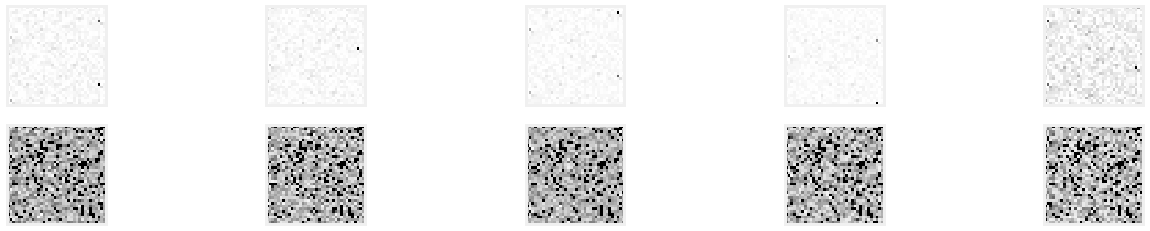

In [280]:
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.gray()
    ax = plt.subplot(2, n, i+1)
    plt.imshow(t_set[i].reshape(36, 36))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    ax = plt.subplot(2, n, i +1+n)
    plt.imshow(decoded_imgs[i].reshape(36, 36))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [282]:
decoded_imgs[0].reshape(36, 36)

array([[0.66049755, 1.0348433 , 0.8529142 , ..., 0.6237134 , 0.        ,
        0.        ],
       [0.88066185, 0.8372743 , 0.70288914, ..., 0.        , 0.        ,
        0.7530315 ],
       [0.8542728 , 0.6301854 , 0.4787185 , ..., 0.        , 1.005693  ,
        0.7218469 ],
       ...,
       [0.77812654, 1.0042573 , 0.9051891 , ..., 0.        , 0.7477325 ,
        0.823318  ],
       [0.89705324, 0.        , 1.024126  , ..., 0.47182274, 0.78122663,
        0.62048227],
       [0.81517106, 0.85657406, 0.19282182, ..., 0.89899373, 0.7914703 ,
        0.6839053 ]], dtype=float32)

In [284]:
t_set[0].reshape(36, 36)

array([[ 0.84067558,  0.99999988,  0.99999857, ...,  0.72184387,
         0.99999978,  0.56613812],
       [ 0.91645408,  0.95447229,  0.95464291, ...,  0.70458504,
         0.96875044,  0.76262207],
       [ 0.90796937,  0.74506766,  0.47597134, ...,  0.94933869,
         0.94753867,  0.67814638],
       ...,
       [ 0.99999971,  0.99999989,  0.91818427, ...,  0.68942408,
         0.9836328 ,  0.97658054],
       [ 0.99999986, -1.15297292,  0.93622251, ...,  0.39411222,
         0.97504552,  0.7519204 ],
       [ 0.99671761,  0.91167644,  0.10338876, ...,  0.930762  ,
         0.95058471,  0.76771069]])